# Clustering, Clasificación y Regresión en Datos de Películas de Hollywood

## 1. Introducción
"""
Este trabajo práctico aplica técnicas de clustering, clasificación y regresión a un conjunto de datos reales sobre películas de Hollywood. 
El objetivo es explorar estructuras latentes en los datos, identificar patrones mediante agrupamiento, y predecir variables de interés como puntuación crítica o presencia de premios.
También se analiza la relación entre los grupos temáticos y el éxito galardonado.
"""

## 2. Carga y Exploración del Dataset


In [1]:
# Cargar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.manifold import TSNE
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

In [2]:
# Cargar datos 
hollywood_df = pd.read_csv('../data/Hollywood films.csv')

# Vista inicial
display(hollywood_df.head())
print("\nResumen del dataset:")
print(hollywood_df.info())
print("\nValores nulos por columna:")
print(hollywood_df.isnull().sum())
print("\nColumnas disponibles:")
print(hollywood_df.columns)



year                                              movie   movie_id  \
0  2001                                     Kate & Leopold  tt0035423   
1  2000                                        Chicken Run  tt0120630   
2  2005                                     Fantastic Four  tt0120667   
3  2002                                              Frida  tt0120679   
4  2001  The Lord of the Rings: The Fellowship of the Ring  tt0120737   

  certificate  duration                       genre  rate  metascore  \
0       PG-13       118      Comedy|Fantasy|Romance   6.4       44.0   
1           G        84  Animation|Adventure|Comedy   7.0       88.0   
2       PG-13       106     Action|Adventure|Family   5.7       40.0   
3           R       123     Biography|Drama|Romance   7.4       61.0   
4       PG-13       178     Adventure|Drama|Fantasy   8.8       92.0   

                                            synopsis    votes  ...  \
0  An English Duke from 1876 is inadvertedly drag...    66660  ...   
1  When a cockerel apparently flies into a chicke...   144475  ...   
2  A group of astronauts gain superpowers after a...   273203  ...   
3  A biography of artist Frida Kahlo, who channel...    63852  ...   
4  A meek Hobbit from the Shire and eight compani...  1286275  ...   

   New_York_Film_Critics_Circle_nominated  \
0                                       0   
1                                       1   
2                                       0   
3                                       0   
4                                       0   

  New_York_Film_Critics_Circle_nominated_categories  \
0                                               NaN   
1                                Best Animated Film   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Los_Angeles_Film_Critics_Association_won  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   Los_Angeles_Film_Critics_Association_won_categories  \
0                                                NaN     
1                                     Best Animation     
2                                                NaN     
3                                                NaN     
4                                         Best Music     

   Los_Angeles_Film_Critics_Association_nominated  \
0                                               0   
1                                               1   
2                                               0   
3                                               0   
4                                               2   

   Los_Angeles_Film_Critics_Association_nominated_categories  \
0                                                NaN           
1                                     Best Animation           
2                                                NaN           
3                                                NaN           
4                  Best Music|Best Production Design           

   release_date.year release_date.month release_date.day-of-month  \
0             2001.0               12.0                      25.0   
1             2000.0                6.0                      23.0   
2             2005.0                7.0                       8.0   
3             2002.0               11.0                      22.0   
4             2001.0               12.0                      19.0   

  release_date.day-of-week  
0                      2.0  
1                      5.0  
2                      5.0  
3                      5.0  
4                      3.0  

[5 rows x 119 columns]


Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Columns: 119 entries, year to release_date.day-of-week
dtypes: float64(10), int64(46), object(63)
memory usage: 1.2+ MB
None

Valores nulos por columna:
year                                                            0
movie                                                           1
movie_id                                                        0
certificate                                                    40
duration                                                        0
                                                             ... 
Los_Angeles_Film_Critics_Association_nominated_categories    1051
release_date.year                                              48
release_date.month                                             48
release_date.day-of-month                                      48
release_date.day-of-week                                       48
Length: 119, dtype: int64


## 3. Preprocesamiento


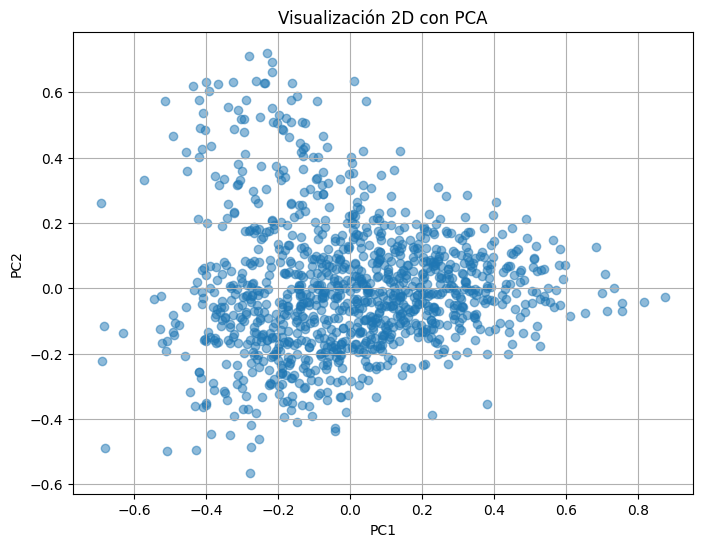

In [3]:


# Características seleccionadas
features = [ 'rate', 'metascore', 'votes', 'user_reviews', 'critic_reviews', 'popularity']
df = hollywood_df[features].dropna()

# Escalado
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Visualización 2D con PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()



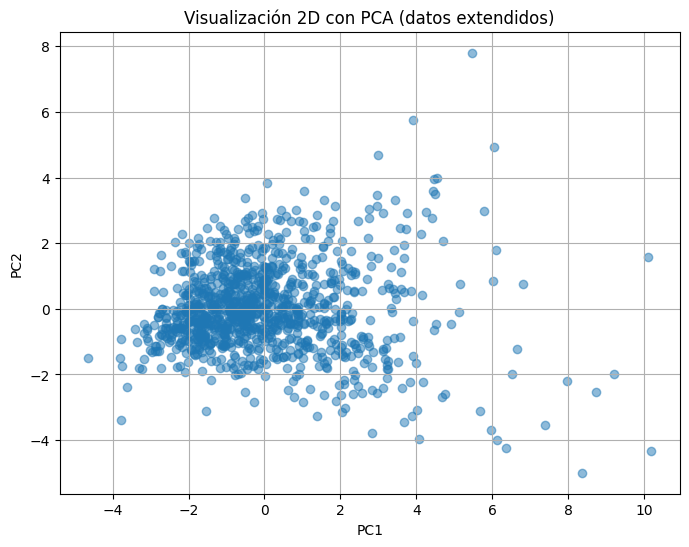

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Características válidas disponibles
features = [
    'duration', 'rate', 'metascore', 'votes', 'gross',
    'user_reviews', 'critic_reviews', 'popularity',
    'release_date.year', 'release_date.month', 'release_date.day-of-week',
    'Golden_Globes_won', 'BAFTA_won'
]

# Filtrar el DataFrame con columnas válidas
df1 = hollywood_df[features].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)

# PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Visualización 2D con PCA (datos extendidos)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


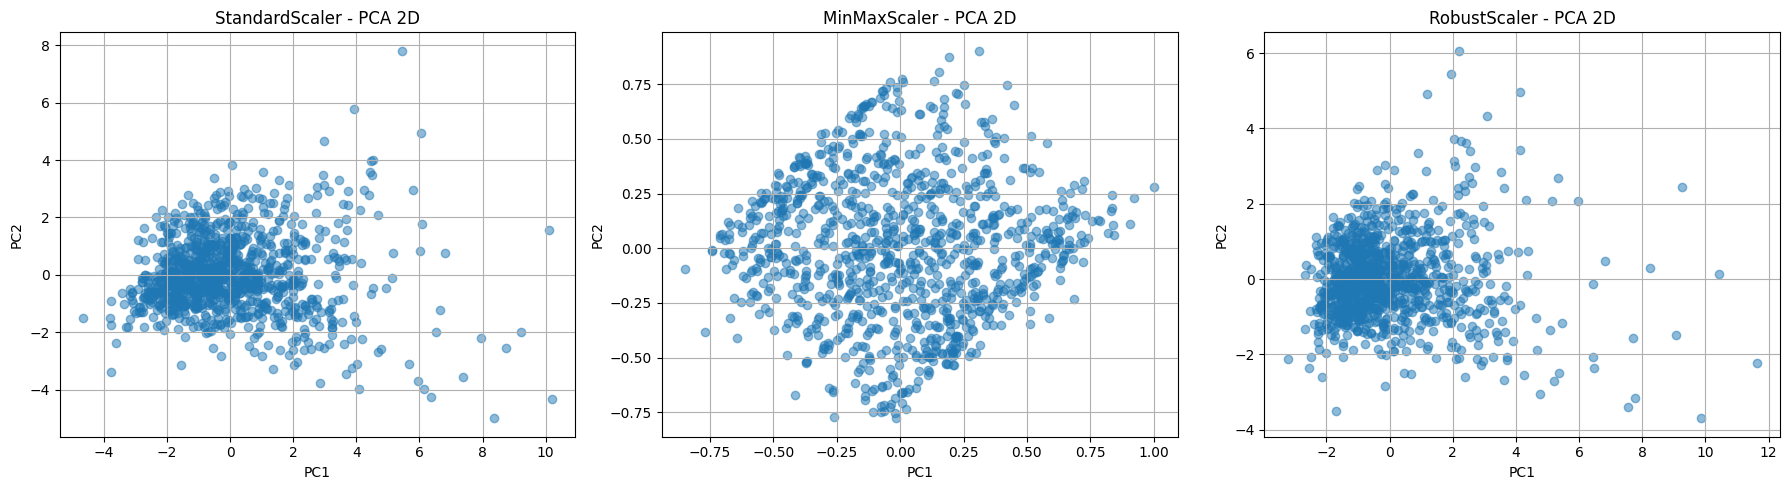

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Características válidas disponibles
features = [
    'duration', 'rate', 'metascore', 'votes', 'gross',
    'user_reviews', 'critic_reviews', 'popularity',
    'release_date.year', 'release_date.month', 'release_date.day-of-week',
    'Golden_Globes_won', 'BAFTA_won'
]

# Filtrar el DataFrame con columnas válidas
df2 = hollywood_df[features].dropna()

# Escaladores que vamos a probar
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Diccionario para guardar los DataFrames escalados
scaled_dfs = {}

# Inicializamos la figura para los gráficos
plt.figure(figsize=(18, 5))

# Aplicamos PCA para cada tipo de escalado
for counter, (scaler_name, scaler) in enumerate(scalers.items(), 1):
    # Escalar los datos
    X_scaled = scaler.fit_transform(df2)
    
    # Guardar como DataFrame con nombres de columnas originales
    scaled_df = pd.DataFrame(X_scaled, columns=df2.columns, index=df2.index)
    scaled_dfs[scaler_name] = scaled_df  # Guardamos en el diccionario

    # PCA con 2 componentes
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Visualización
    plt.subplot(1, 3, counter)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.title(f"{scaler_name} - PCA 2D")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definir el número de clusters (puedes ajustarlo o usar el mejor_k si lo tienes calculado)
k = 2

# Diccionario para guardar los silhouette scores
silhouette_results = {}

# Recorrer cada DataFrame escalado
for scaler_name, scaled_df in scaled_dfs.items():
    # Aplicar KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)

    # Calcular Silhouette Score
    sil_score = silhouette_score(scaled_df, labels)
    silhouette_results[scaler_name] = sil_score

# Mostrar los resultados
for name, score in silhouette_results.items():
    print(f"{name}: Silhouette Score = {score:.3f}")


StandardScaler: Silhouette Score = 0.245
MinMaxScaler: Silhouette Score = 0.186
RobustScaler: Silhouette Score = 0.322


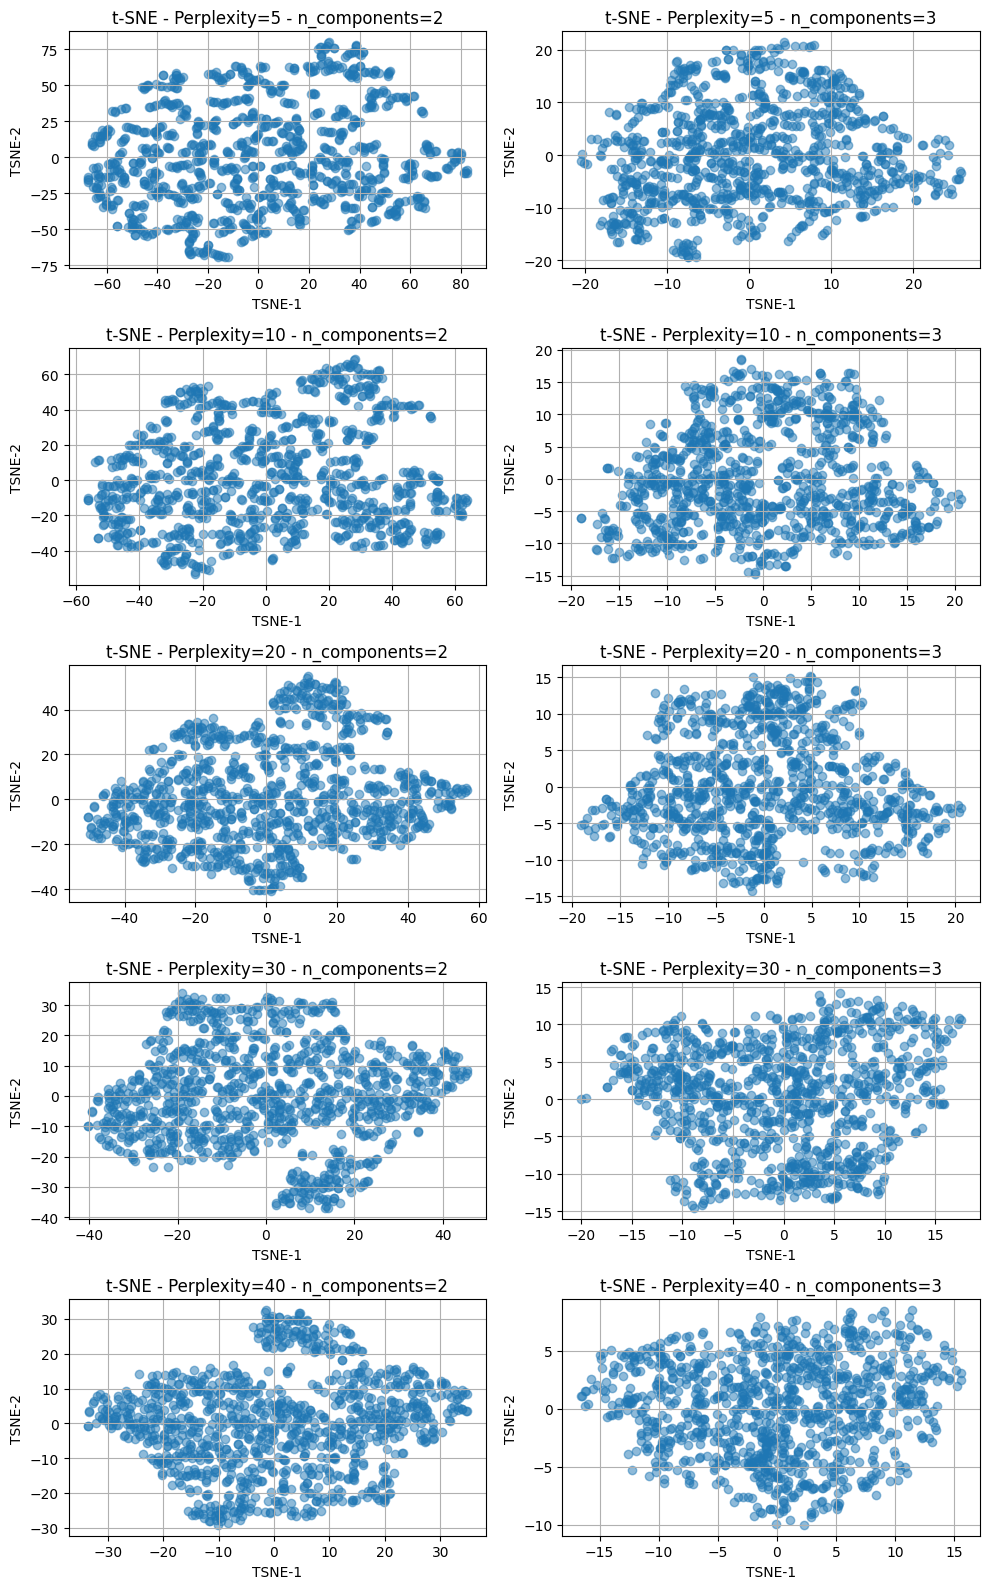

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Lista de diferentes valores para perplexity
perplexity_range = [5, 10, 20, 30, 40]
# Lista de diferentes valores para n_components (solo 2 o 3 debido a las limitaciones de 'barnes_hut')
n_components_range = [2, 3]

# Crear un gráfico para cada valor de perplexity y n_components
plt.figure(figsize=(10, 16))
counter = 1  # Para crear una secuencia de subgráficos

for p in perplexity_range:
    for n in n_components_range:
        tsne = TSNE(n_components=n, perplexity=p, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)

        # Subgráfico para cada valor de perplexity y n_components
        plt.subplot(len(perplexity_range), len(n_components_range), counter)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
        plt.title(f"t-SNE - Perplexity={p} - n_components={n}")
        plt.xlabel(f"TSNE-1")
        plt.ylabel(f"TSNE-2")
        plt.grid(True)
        
        counter += 1  # Incrementamos el contador para los subgráficos

plt.tight_layout()
plt.show()


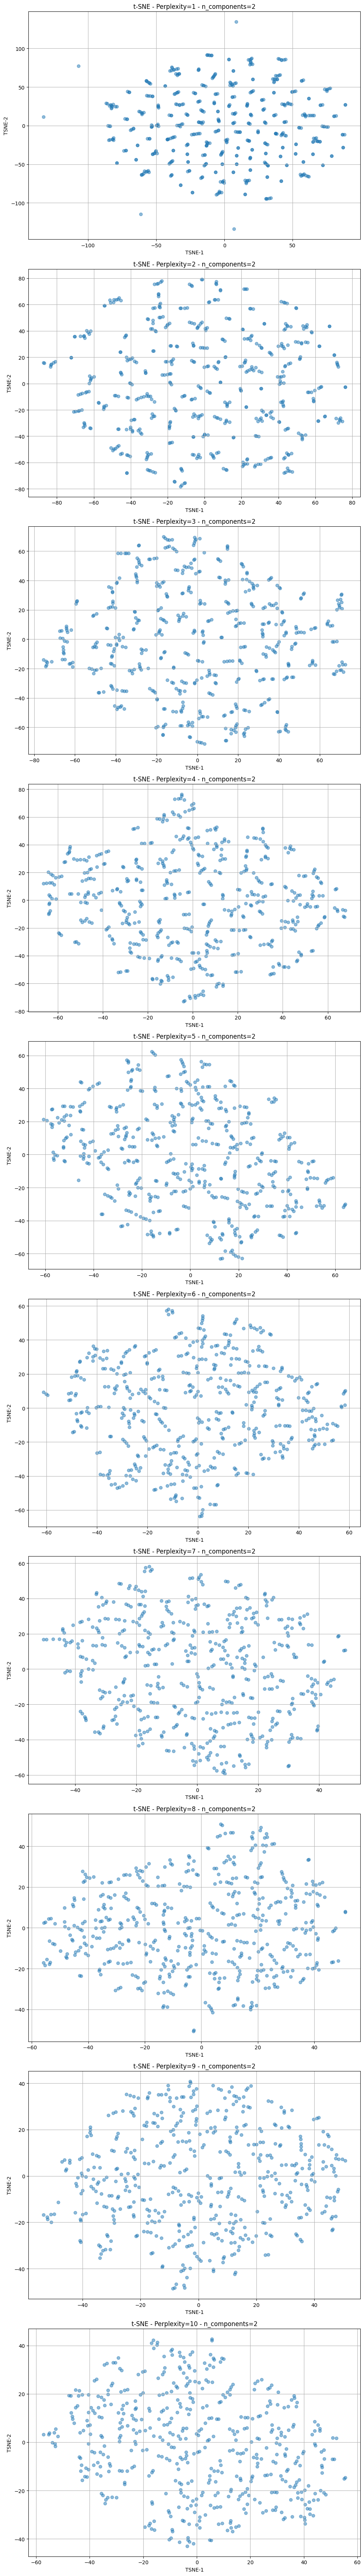

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Lista de diferentes valores para perplexity
perplexity_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Lista de diferentes valores para n_components (solo 2 o 3 debido a las limitaciones de 'barnes_hut')
n_components_range = [2]

# Crear un gráfico para cada valor de perplexity y n_components
plt.figure(figsize=(10, 70))
counter = 1  # Para crear una secuencia de subgráficos

for p in perplexity_range:
    for n in n_components_range:
        tsne = TSNE(n_components=n, perplexity=p, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)

        # Subgráfico para cada valor de perplexity y n_components
        plt.subplot(len(perplexity_range), len(n_components_range), counter)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
        plt.title(f"t-SNE - Perplexity={p} - n_components={n}")
        plt.xlabel(f"TSNE-1")
        plt.ylabel(f"TSNE-2")
        plt.grid(True)
        
        counter += 1  # Incrementamos el contador para los subgráficos

plt.tight_layout()
plt.show()

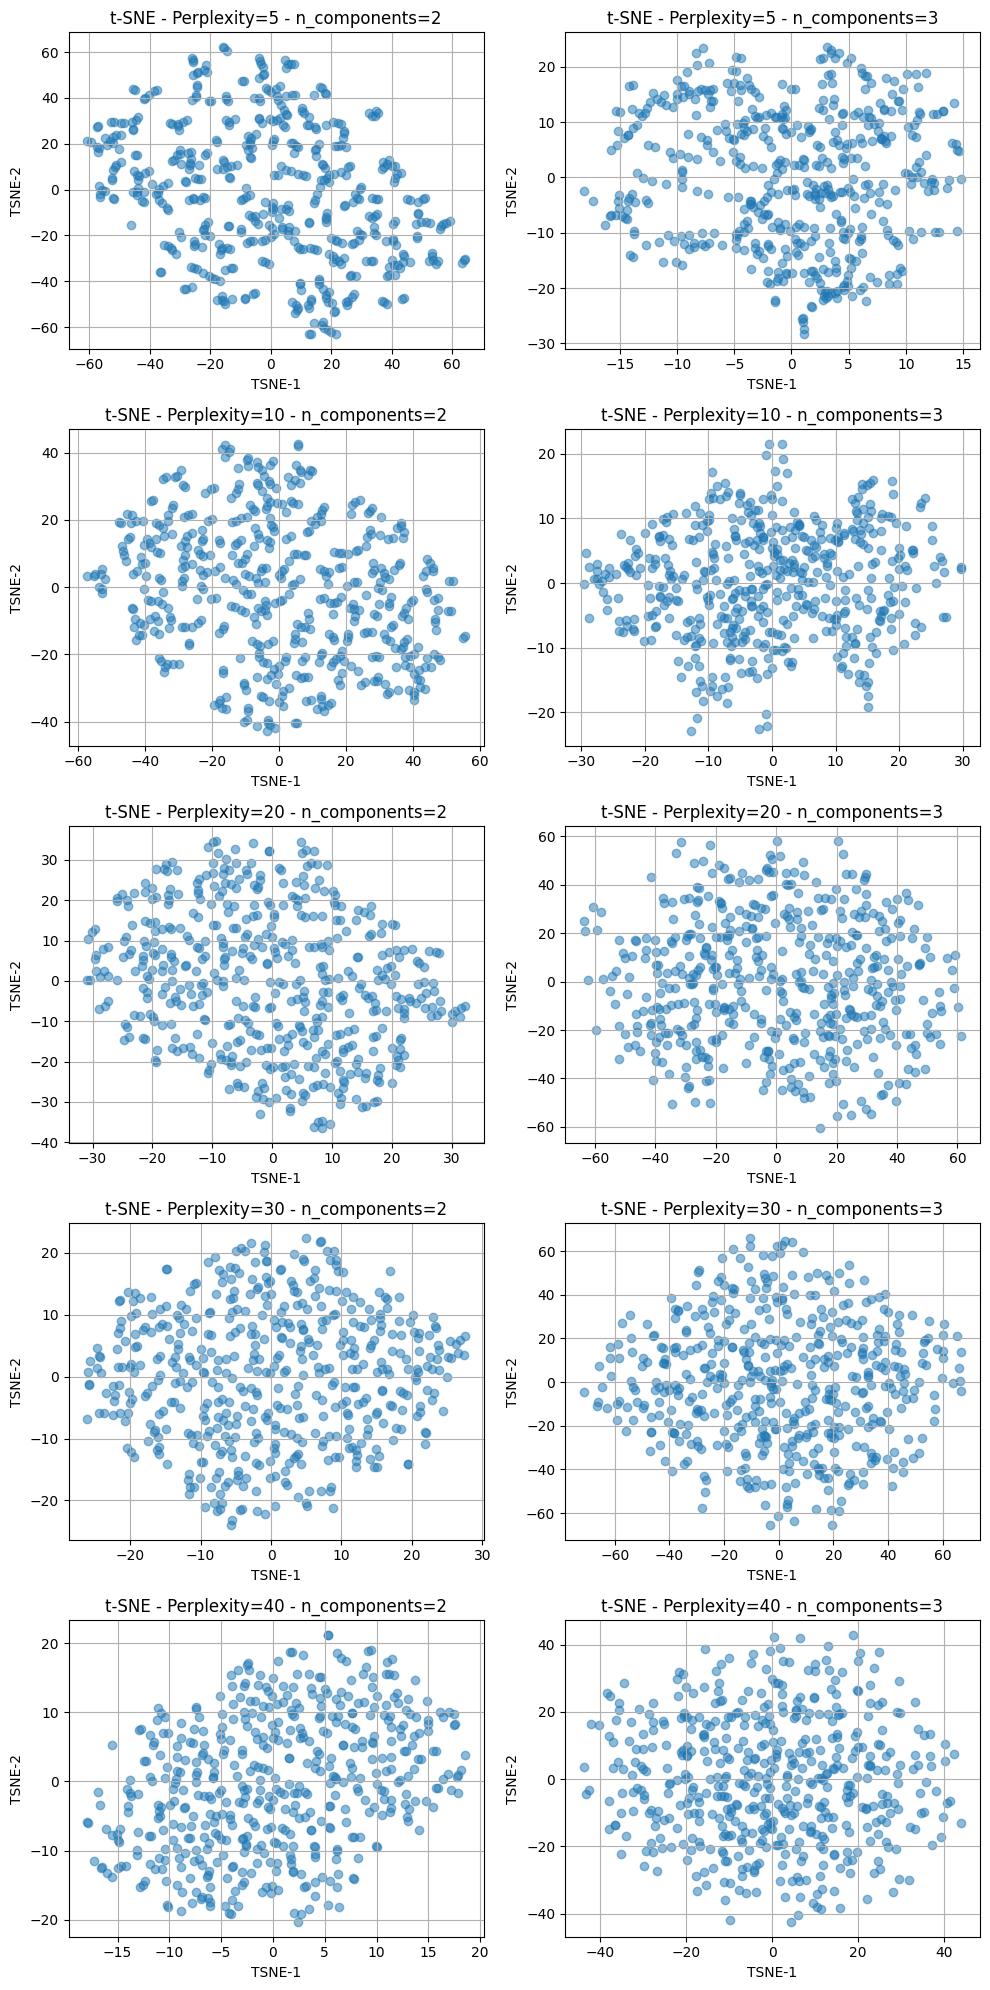

In [42]:
# Reimportar dependencias necesarias después del reset del entorno
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Cargar datos de ejemplo simulados (en un entorno real cargarías tu dataset real)
# Aquí generaremos un DataFrame simulado para propósitos de demostración
import numpy as np
np.random.seed(42)

# Simulación de datos similares a los usados en el análisis
n_samples = 500
hollywood_df = pd.DataFrame({
    'duration': np.random.randint(80, 180, n_samples),
    'rate': np.random.uniform(1, 10, n_samples),
    'metascore': np.random.randint(10, 100, n_samples),
    'votes': np.random.randint(1000, 1000000, n_samples),
    'gross': np.random.uniform(1e6, 1e9, n_samples),
    'user_reviews': np.random.randint(1, 5000, n_samples),
    'critic_reviews': np.random.randint(1, 500, n_samples),
    'popularity': np.random.randint(1, 100, n_samples),
    'release_date.year': np.random.randint(1980, 2025, n_samples),
    'release_date.month': np.random.randint(1, 13, n_samples),
    'release_date.day-of-week': np.random.randint(0, 7, n_samples),
    'Golden_Globes_won': np.random.randint(0, 2, n_samples),
    'BAFTA_won': np.random.randint(0, 2, n_samples)
})

# Selección de características
features = [
    'duration', 'rate', 'metascore', 'votes', 'gross',
    'user_reviews', 'critic_reviews', 'popularity',
    'release_date.year', 'release_date.month', 'release_date.day-of-week',
    'Golden_Globes_won', 'BAFTA_won'
]

# Filtrar y escalar datos
df_tsne = hollywood_df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_tsne)

# Configuración de t-SNE
perplexity_range = [5, 10, 20, 30, 40]
n_components_range = [2, 3]

# Visualización
plt.figure(figsize=(10, 20))
counter = 1

for p in perplexity_range:
    for n in n_components_range:
        tsne = TSNE(n_components=n, perplexity=p, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        
        plt.subplot(len(perplexity_range), len(n_components_range), counter)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
        plt.title(f"t-SNE - Perplexity={p} - n_components={n}")
        plt.xlabel("TSNE-1")
        plt.ylabel("TSNE-2")
        plt.grid(True)
        
        counter += 1

plt.tight_layout()
plt.show()


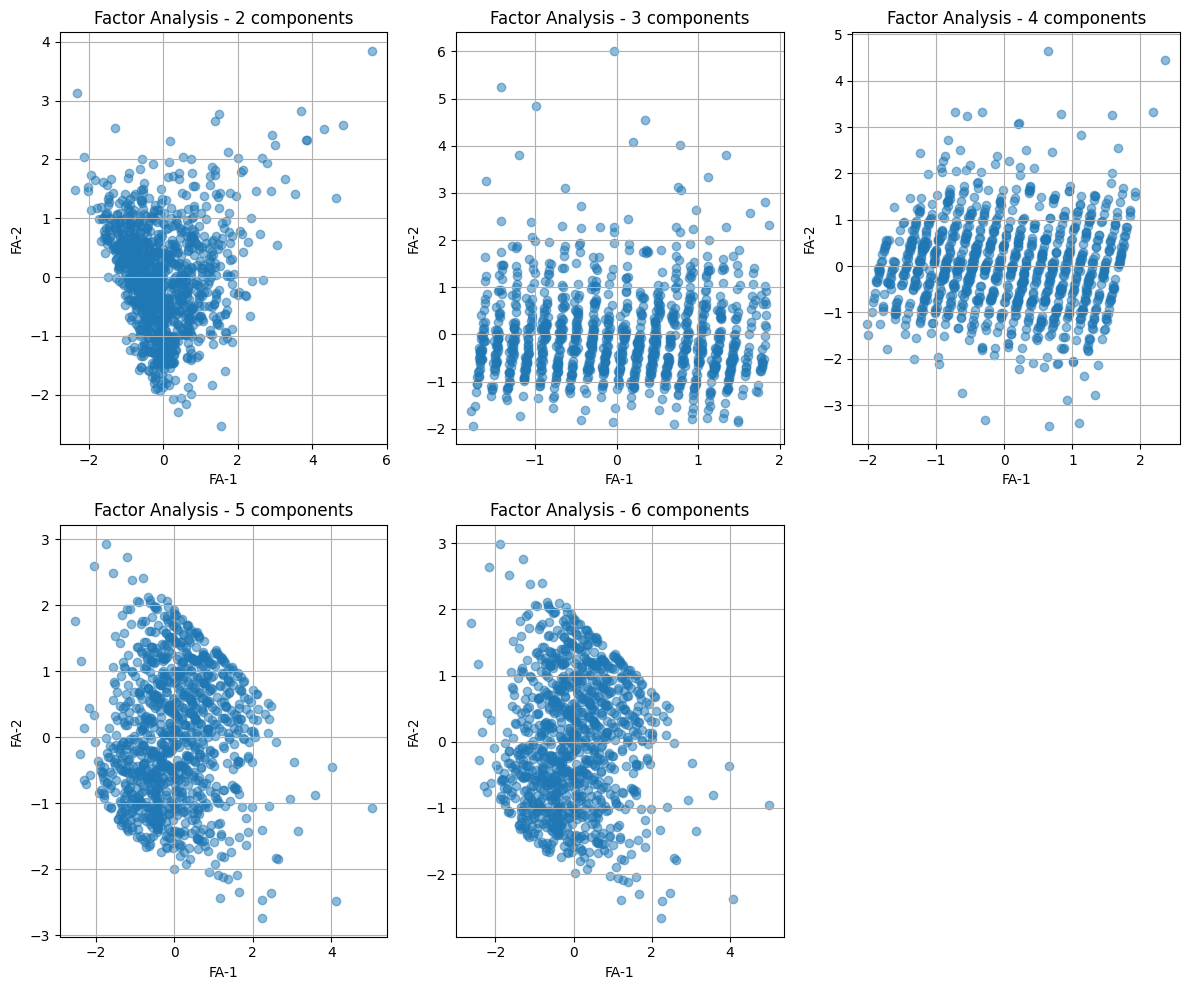

In [8]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# Lista de diferentes valores para n_components
n_components_range = [2, 3, 4, 5, 6]

# Crear un gráfico para cada valor de n_components
plt.figure(figsize=(12, 10))
for n in n_components_range:
    fa = FactorAnalysis(n_components=n, random_state=40)
    X_fa = fa.fit_transform(X_scaled)

    # Subgráfico para cada número de componentes
    plt.subplot(2, 3, n_components_range.index(n) + 1)
    plt.scatter(X_fa[:, 0], X_fa[:, 1], alpha=0.5)
    plt.title(f"Factor Analysis - {n} components")
    plt.xlabel("FA-1")
    plt.ylabel("FA-2")
    plt.grid(True)

plt.tight_layout()
plt.show()


## 4. K-Means Clustering


Silhouette Score (KMeans, k=4): 0.125


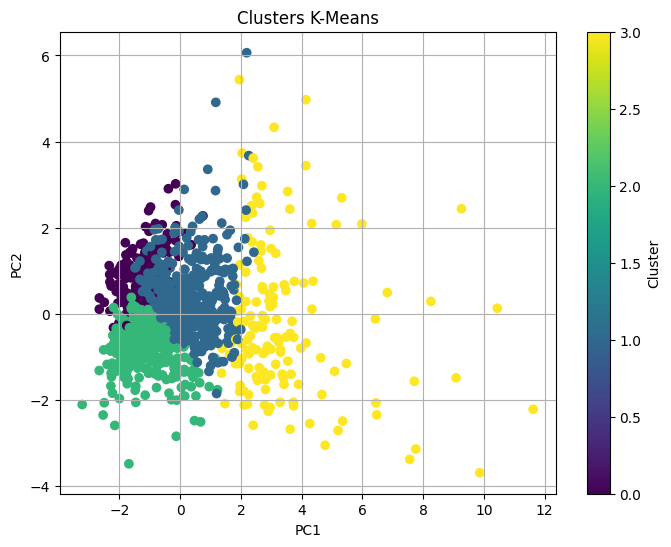

In [9]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluación
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score (KMeans, k=4): {silhouette_kmeans:.3f}")

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters K-Means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Crear DataFrame reducido con información original y clusters
df_clustered = hollywood_df.loc[df.index].copy()
df_clustered['cluster'] = kmeans_labels

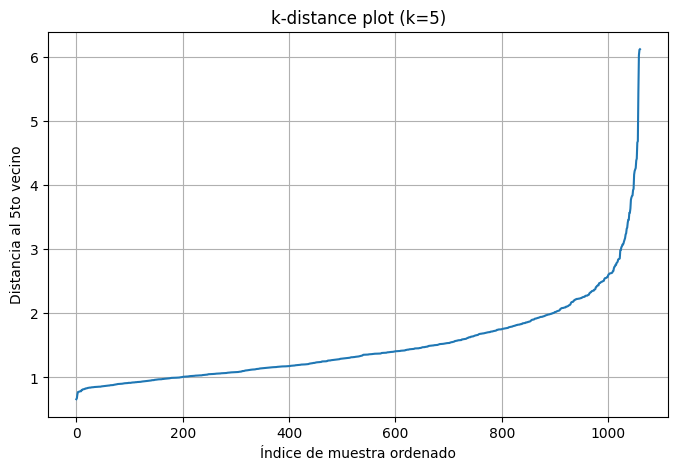

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calcular distancias al 5to vecino más cercano
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias
distances = np.sort(distances[:, 4])  # 5to vecino
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("k-distance plot (k=5)")
plt.xlabel("Índice de muestra ordenado")
plt.ylabel("Distancia al 5to vecino")
plt.grid(True)
plt.show()


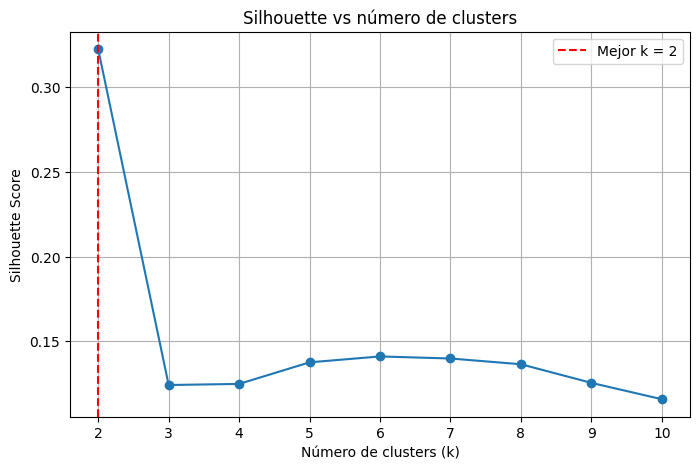

Mejor número de clusters según Silhouette: k = 2 con score = 0.322


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Suponiendo que ya tienes X_scaled (tus datos escalados) listos para usar
# Definir el rango de k
k_range = range(2, 11)  # Puedes ajustar este rango según tus necesidades

sil_scores = []

# Calcular el Silhouette Score para cada valor de k
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Obtener el mejor número de clusters (k) y el mejor Silhouette Score
best_k = k_range[np.argmax(sil_scores)]
best_score = max(sil_scores)

# Visualización del Silhouette Score vs Número de Clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette vs número de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

# Línea vertical para indicar el mejor k
plt.axvline(best_k, linestyle='--', color='red', label=f"Mejor k = {best_k}")
plt.legend()
plt.show()

# Imprimir el mejor número de clusters y el Silhouette Score
print(f"Mejor número de clusters según Silhouette: k = {best_k} con score = {best_score:.3f}")


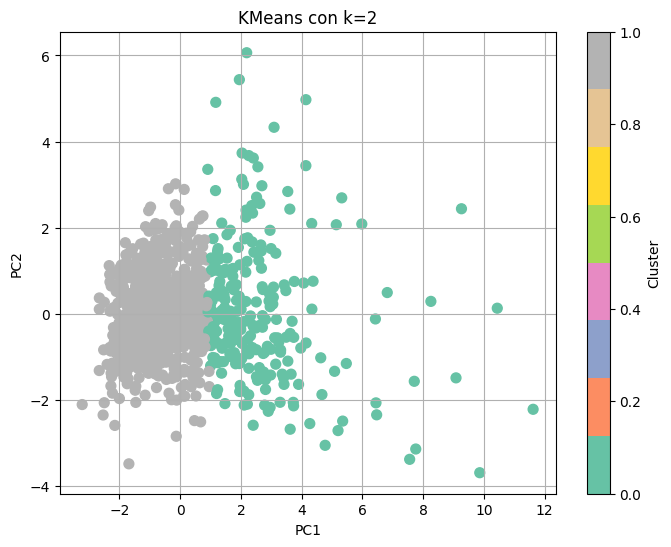

In [12]:
kmeans_final = KMeans(n_clusters=2, random_state=42)
final_labels = kmeans_final.fit_predict(X_scaled)

# Visualización en PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='Set2', s=50)
plt.title("KMeans con k=2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


## 5. Análisis por Cluster y Género


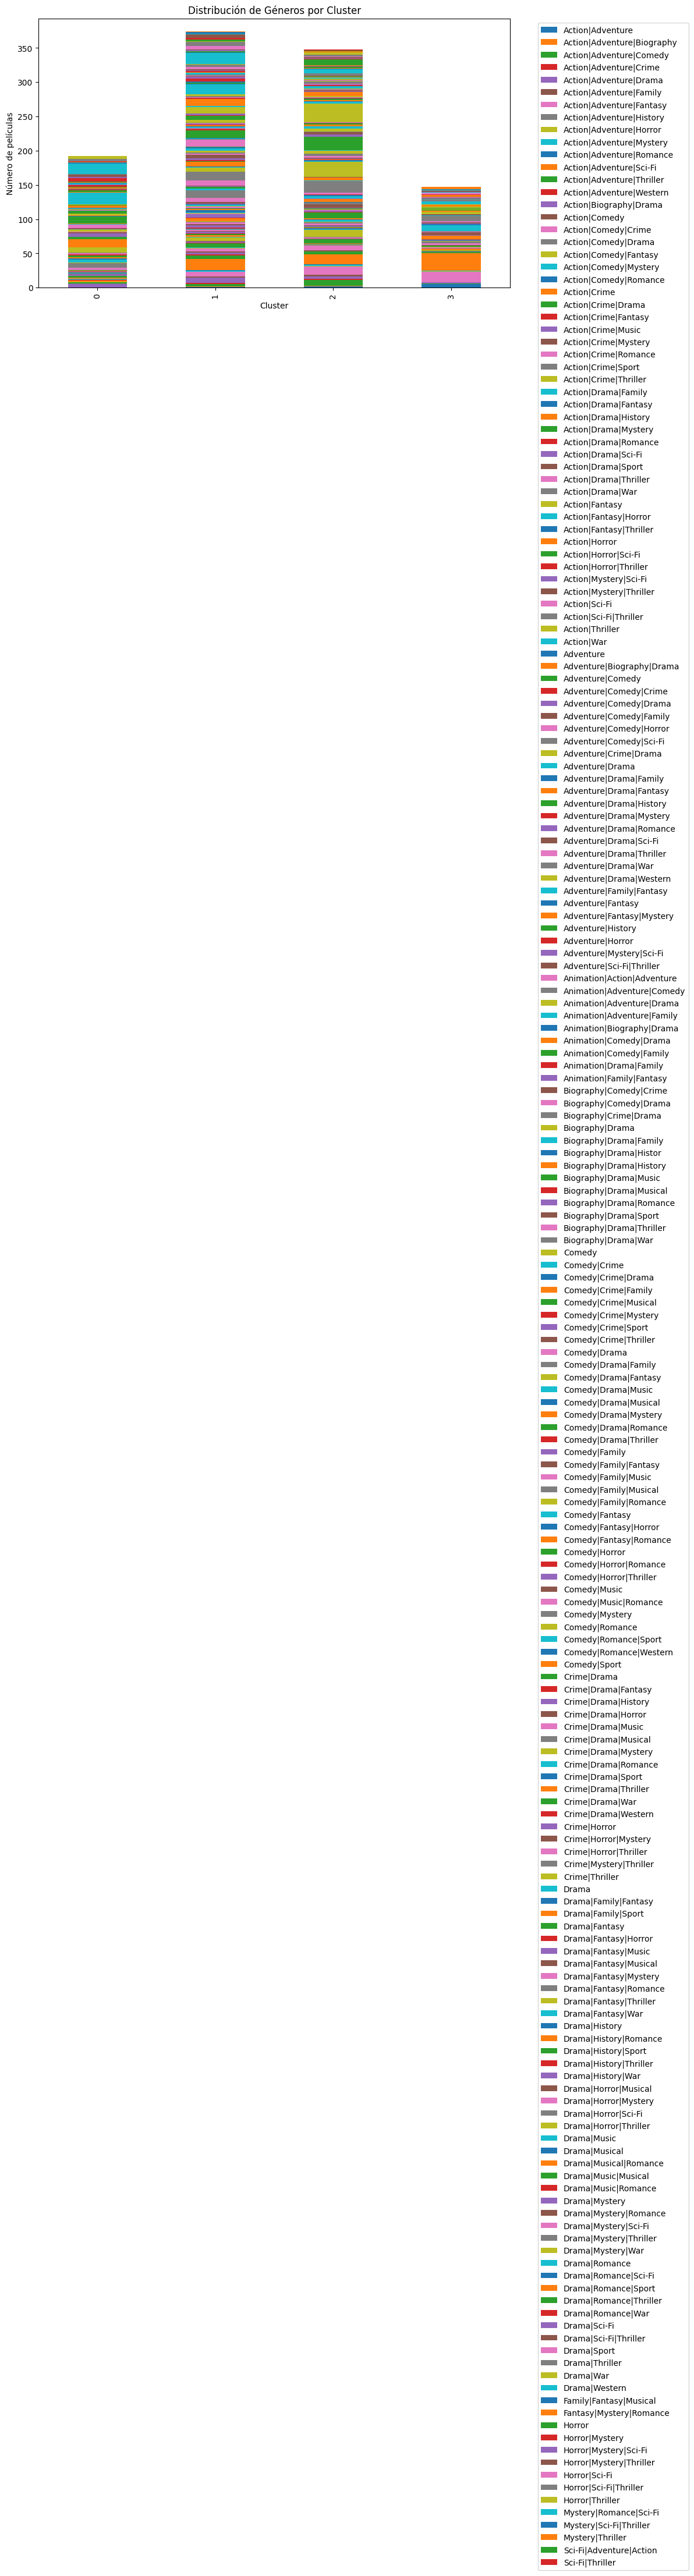

In [13]:
# Visualización de distribución de géneros por cluster
cluster_genre = df_clustered.groupby(['cluster', 'genre']).size().unstack().fillna(0)
cluster_genre.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Distribución de Géneros por Cluster")
plt.ylabel("Número de películas")
plt.xlabel("Cluster")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.8)
plt.show()


In [14]:
hollywood_df['genre'].value_counts()


genre
Drama                         59
Action|Adventure|Sci-Fi       56
Drama|Romance                 48
Comedy|Drama|Romance          47
Animation|Adventure|Comedy    46
                              ..
Drama|Fantasy|War              1
Drama|Fantasy|Mystery          1
Drama|Fantasy|Musical          1
Action|Comedy|Mystery          1
Documentary|Drama              1
Name: count, Length: 236, dtype: int64

In [15]:
# Separar los géneros por "|"
genre_split = hollywood_df['genre'].str.split('|', expand=True)
genre_split.columns = ['genre_1', 'genre_2', 'genre_3']

# Agregar al dataframe original
hollywood_df = pd.concat([hollywood_df, genre_split], axis=1)


In [16]:
# Puntuación media por género 1, 2 y 3
genre_rating_1 = hollywood_df.groupby('genre_1')['rate'].mean().sort_values(ascending=False)
genre_rating_2 = hollywood_df.groupby('genre_2')['rate'].mean().sort_values(ascending=False)
genre_rating_3 = hollywood_df.groupby('genre_3')['rate'].mean().sort_values(ascending=False)

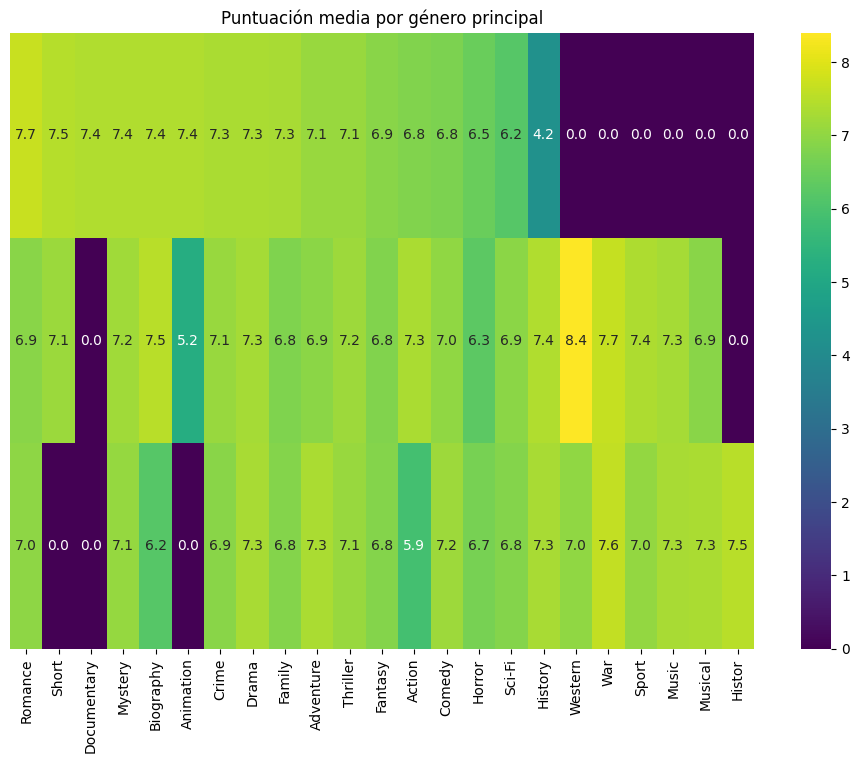

In [17]:
# Visualización en heatmap para los tres géneros
genre_rating = pd.concat([genre_rating_1, genre_rating_2, genre_rating_3], axis=1).fillna(0)
genre_rating.columns = ['Genre 1', 'Genre 2', 'Genre 3']

plt.figure(figsize=(12, 8))
sns.heatmap(genre_rating.T, cmap='viridis', annot=True, fmt=".1f")
plt.title("Puntuación media por género principal")
plt.yticks([])  # eliminar eje Y
plt.show()

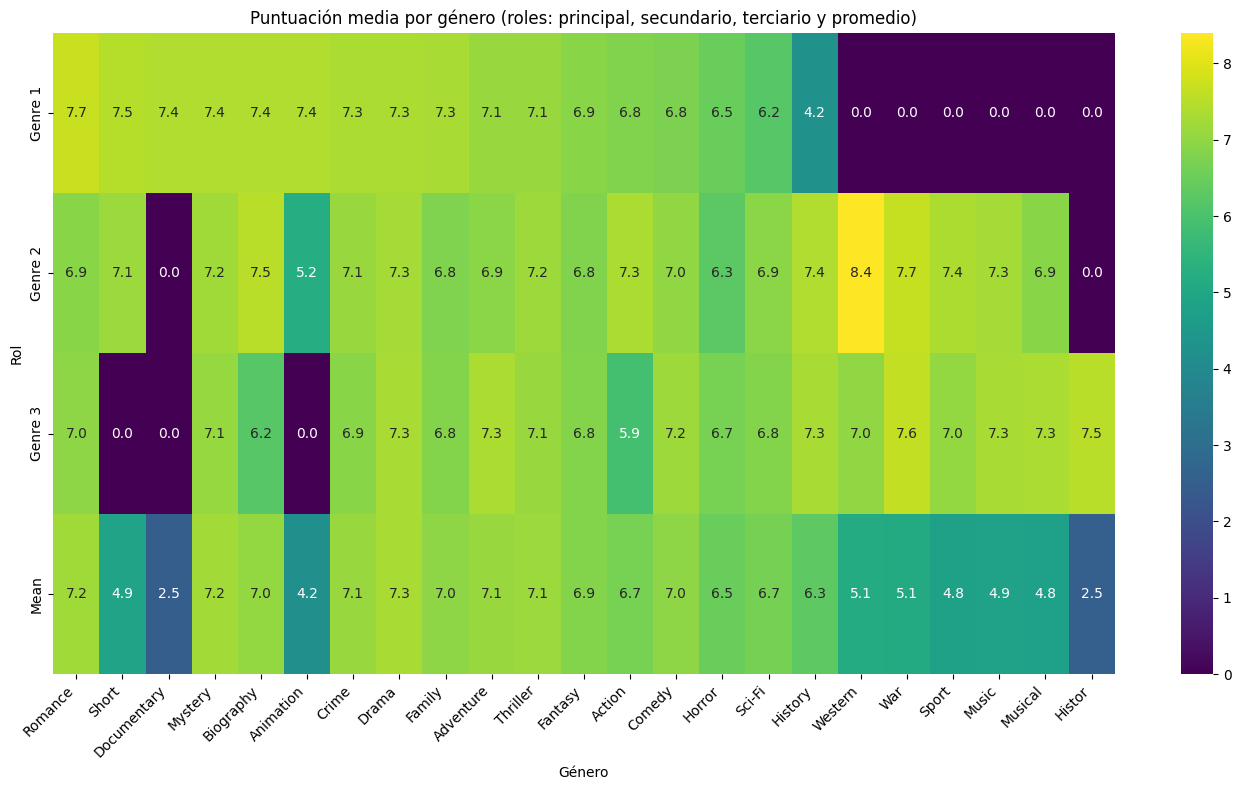

In [18]:
# Visualización en heatmap para los tres géneros
genre_rating = pd.concat([genre_rating_1, genre_rating_2, genre_rating_3], axis=1).fillna(0)
genre_rating.columns = ['Genre 1', 'Genre 2', 'Genre 3']

# Calcular media final de cada género
genre_rating['Mean'] = genre_rating.mean(axis=1)

# Reordenar columnas para incluir la media al final
genre_rating = genre_rating[['Genre 1', 'Genre 2', 'Genre 3', 'Mean']]

# Transponer para heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(genre_rating.T, cmap='viridis', annot=True, fmt=".1f")
plt.title("Puntuación media por género (roles: principal, secundario, terciario y promedio)")
plt.xlabel("Género")
plt.ylabel("Rol")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


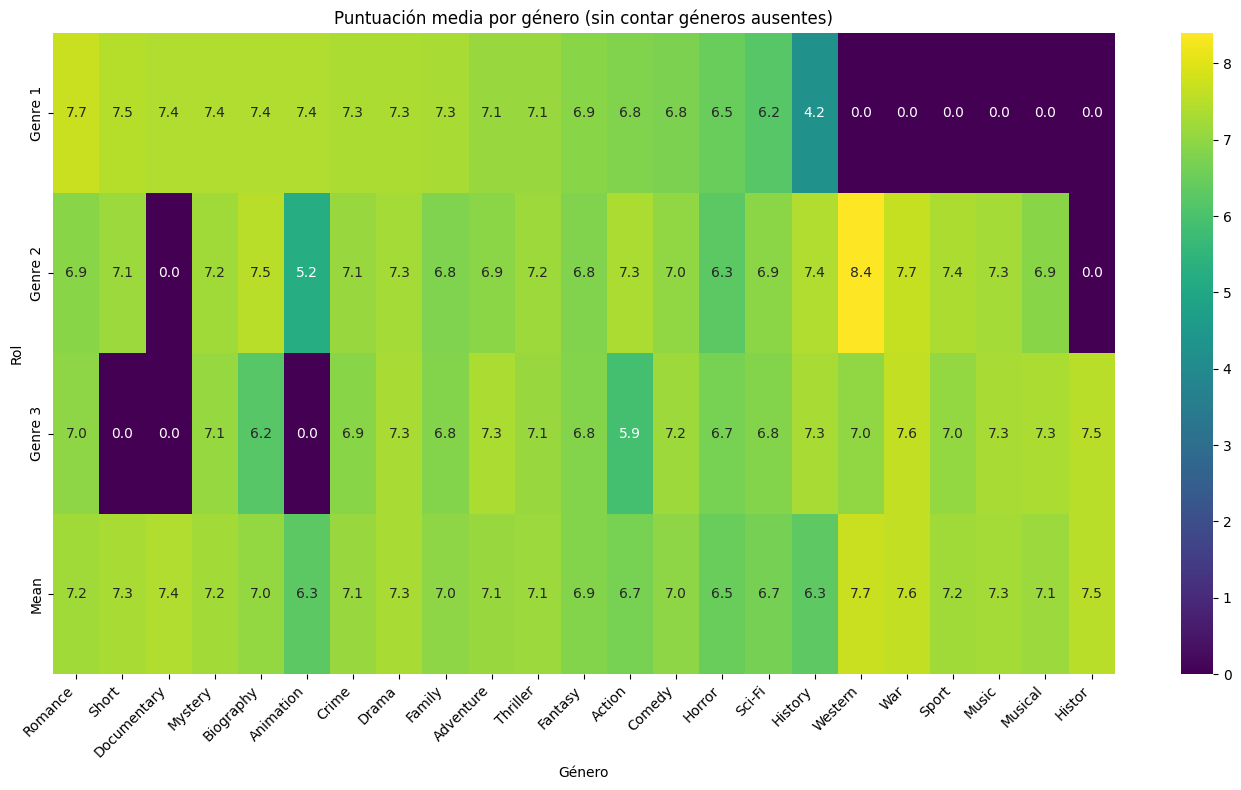

In [19]:
# Unir puntuaciones por cada aparición de género
genre_rating = pd.concat([genre_rating_1, genre_rating_2, genre_rating_3], axis=1)
genre_rating.columns = ['Genre 1', 'Genre 2', 'Genre 3']

# Reemplazar NaN por 0 solo para visualización, pero conservar NaN para el cálculo de la media
genre_rating_display = genre_rating.fillna(0)

# Calcular la media solo sobre valores distintos de cero (sin contar los ausentes)
genre_rating['Mean'] = genre_rating.apply(lambda row: row[row.notna()].mean(), axis=1)

# Concatenar con la columna de media
genre_rating_display['Mean'] = genre_rating['Mean']

# Reordenar columnas
genre_rating_display = genre_rating_display[['Genre 1', 'Genre 2', 'Genre 3', 'Mean']]

# Visualización del heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(genre_rating_display.T, cmap='viridis', annot=True, fmt=".1f")
plt.title("Puntuación media por género (sin contar géneros ausentes)")
plt.xlabel("Género")
plt.ylabel("Rol")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


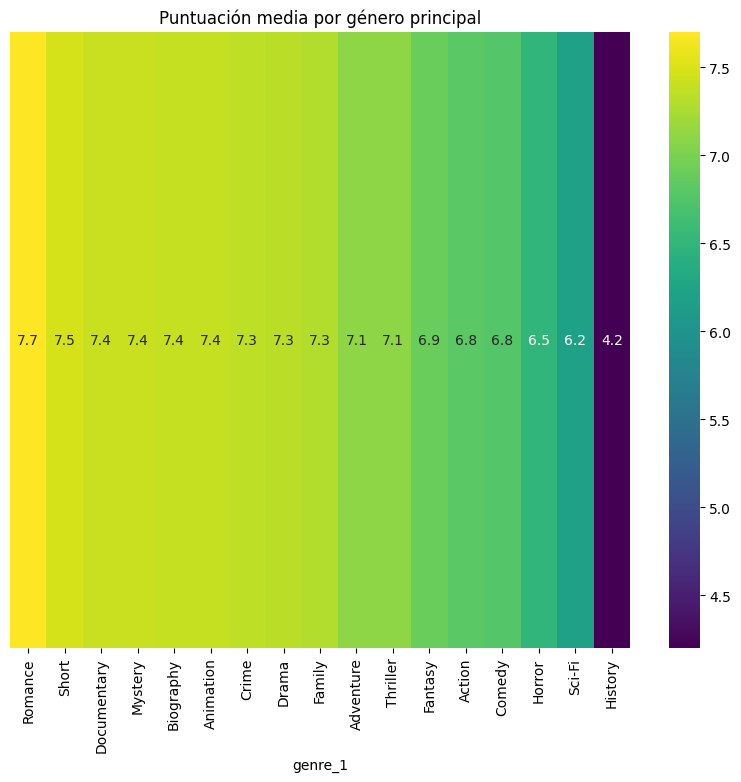

In [20]:
# Puntuación media por género 1
genre_rating = hollywood_df.groupby('genre_1')['rate'].mean().sort_values(ascending=False)

# Visualización en heatmap
plt.figure(figsize=(10,8))
sns.heatmap(genre_rating.to_frame().T, cmap='viridis', annot=True, fmt=".1f")
plt.title("Puntuación media por género principal")
plt.yticks([])  # eliminar eje Y
plt.show()


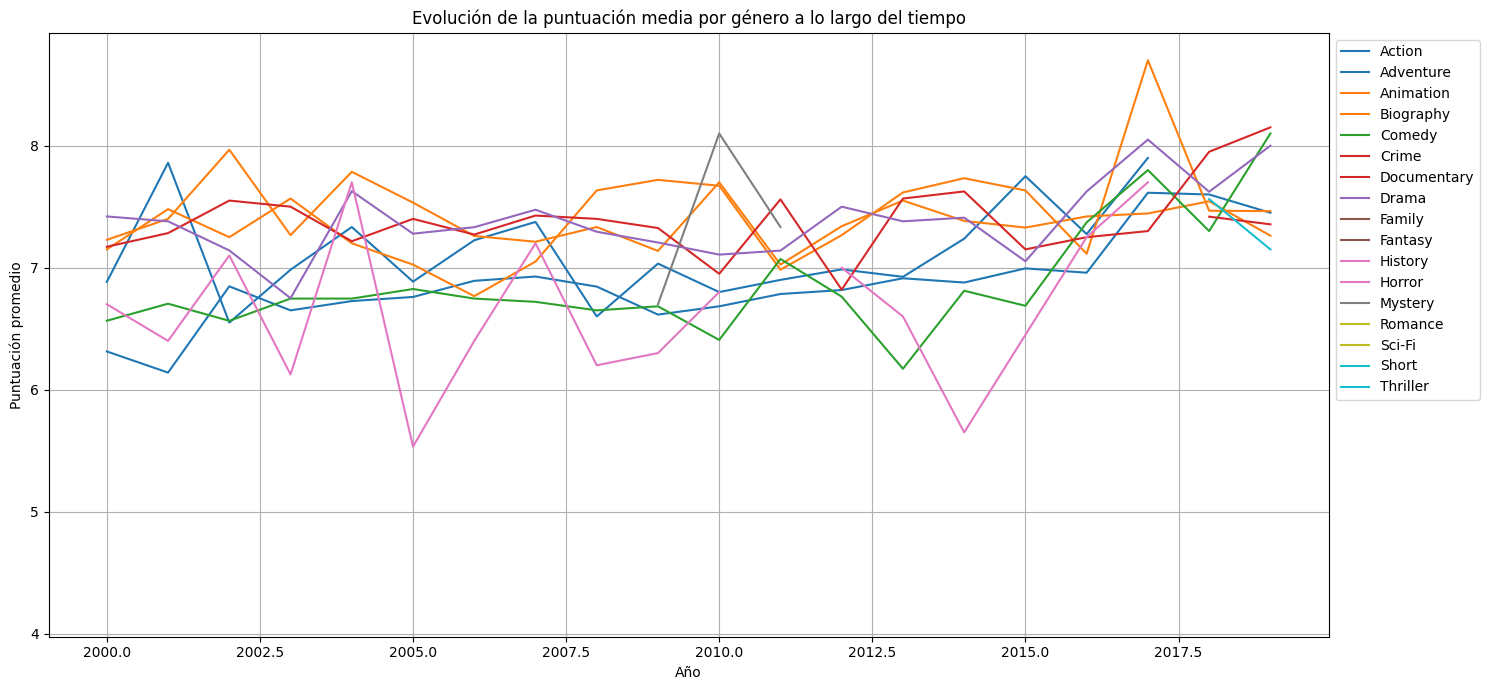

In [21]:
# Eliminar valores nulos para año y rate
yearly = hollywood_df.dropna(subset=['year', 'rate', 'genre_1'])

# Puntuación media por año y género 1
pivot = yearly.pivot_table(index='year', columns='genre_1', values='rate', aggfunc='mean')

# Gráfico
pivot.plot(figsize=(15,7), cmap='tab10')
plt.title("Evolución de la puntuación media por género a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Puntuación promedio")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



## 6. Premios por Cluster


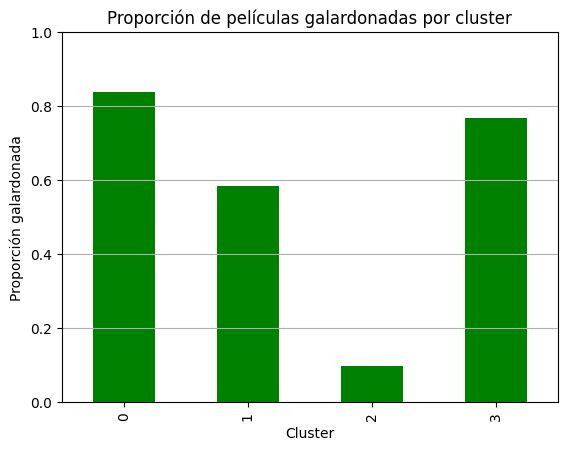

In [22]:
# Proporción de películas galardonadas por cluster
df_clustered['awarded'] = df_clustered['Oscar_nominated'].fillna(0).astype(bool)
award_counts = df_clustered.groupby('cluster')['awarded'].mean()
award_counts.plot(kind='bar', color='green')
plt.title("Proporción de películas galardonadas por cluster")
plt.ylabel("Proporción galardonada")
plt.xlabel("Cluster")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


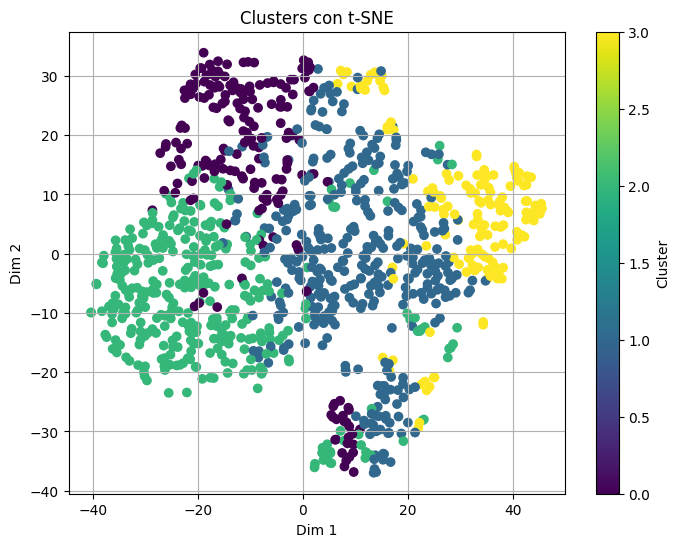

In [23]:
# 2. t-SNE Clustering
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters con t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

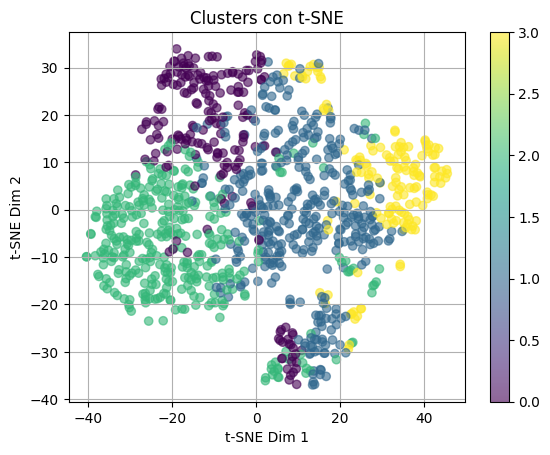

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title("Clusters con t-SNE")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.colorbar()
plt.show()


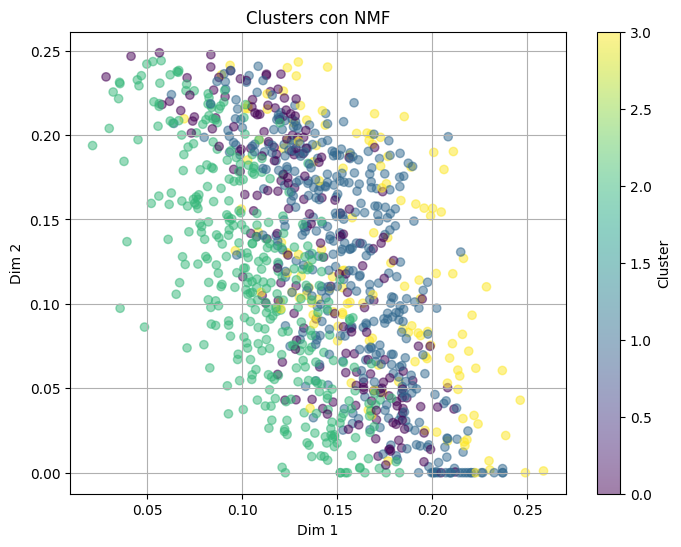

In [41]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Reescalar para NMF (valores positivos)
minmax_scaler = MinMaxScaler()
X_nmf_input = minmax_scaler.fit_transform(df1)

# Aplicar NMF con más iteraciones y menor tolerancia
nmf = NMF(n_components=2, max_iter=500, tol=1e-4, random_state=42)
X_nmf = nmf.fit_transform(X_nmf_input)

# Visualización de clusters con NMF
plt.figure(figsize=(8,6))
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title("Clusters con NMF")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()



Silhouette Score (DBSCAN): -1.000


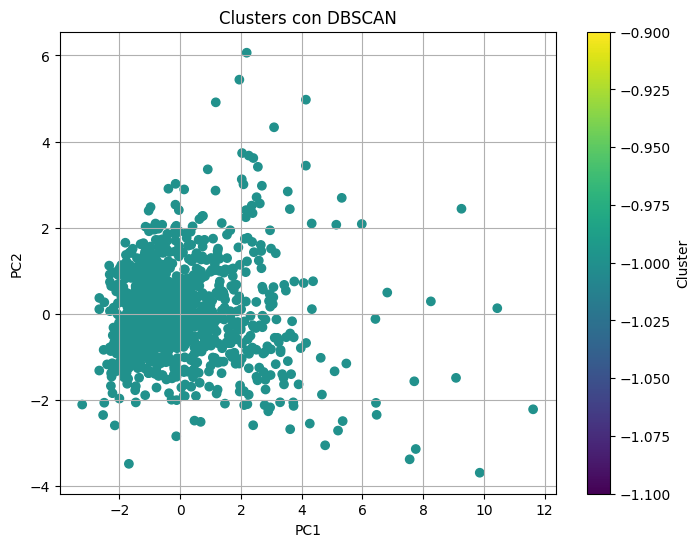

Adjusted Rand Index (KMeans vs DBSCAN): 0.000


In [26]:
# Comparación de Clustering (KMeans vs DBSCAN)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluación de DBSCAN
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.3f}")

# Visualización de DBSCAN
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("Clusters con DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()
# Evaluación de clustering (Silhouette y Adjusted Rand Index)
print(f"Adjusted Rand Index (KMeans vs DBSCAN): {adjusted_rand_score(kmeans_labels, dbscan_labels):.3f}")

Número de clusters encontrados: 0
Número de outliers: 1061
No hay suficientes clusters para calcular Silhouette Score.


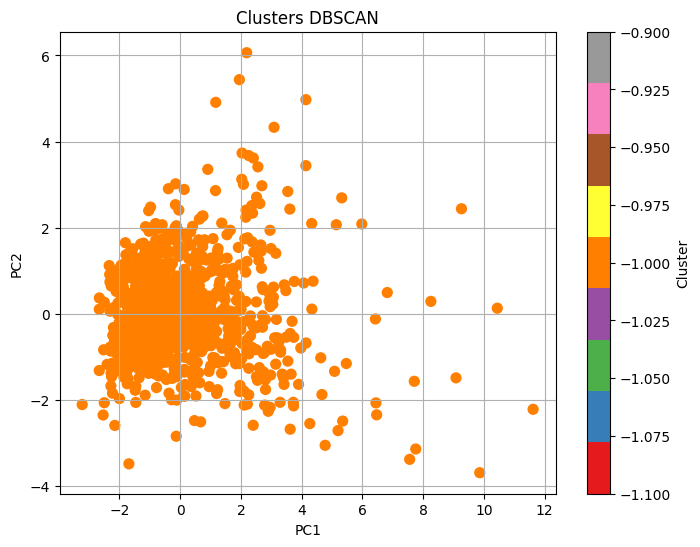

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# DBSCAN con parámetros iniciales
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels_db = db.labels_

# Ver cuántos clusters hay
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_outliers = list(labels_db).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de outliers: {n_outliers}")

# Solo calcular silueta si hay al menos 2 clusters
if n_clusters >= 2:
    sil_db = silhouette_score(X_scaled[labels_db != -1], labels_db[labels_db != -1])
    print(f"Silhouette Score (DBSCAN): {sil_db:.3f}")
else:
    print("No hay suficientes clusters para calcular Silhouette Score.")

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap='Set1', s=50)
plt.title("Clusters DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


eps=0.2 --> No suficientes clusters
eps=0.2 --> No suficientes clusters
eps=0.2 --> No suficientes clusters
eps=0.2 --> No suficientes clusters
eps=0.2 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.3 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.4 --> No suficientes clusters
eps=0.5 --> No suficientes clusters
eps=0.5 --> No suficientes clusters
eps=0.5 --> No suficientes c

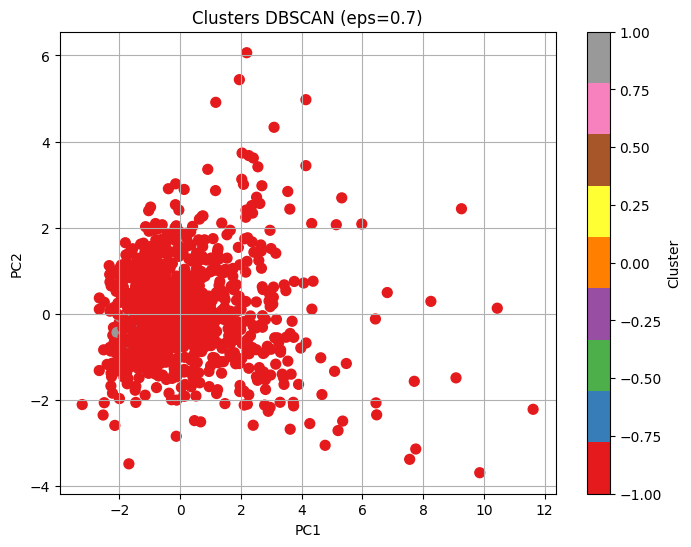

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_eps = None
best_score = -1
best_labels = None

for eps in np.arange(0.2, 3.0, 0.01):
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters >= 2:
        score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
        print(f"eps={eps:.1f} --> Clusters: {n_clusters}, Silhouette: {score:.3f}")
        if score > best_score:
            best_score = score
            best_eps = eps
            best_labels = labels
    else:
        print(f"eps={eps:.1f} --> No suficientes clusters")

# Visualizar el mejor
if best_labels is not None:
    print(f"\n✅ Mejor eps: {best_eps:.1f} con Silhouette: {best_score:.3f}")
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='Set1', s=50)
    plt.title(f"Clusters DBSCAN (eps={best_eps:.1f})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.colorbar(label='Cluster')
    plt.show()
else:
    print("❌ No se encontraron clusters válidos con ningún valor de eps.")


In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prueba con un valor más alto de eps
eps_value = 0.6  # Ajustado tras la observación de que hay pocos clusters
min_samples_value = 10  # Ajustamos min_samples para agrupar más puntos

# Ejecutamos DBSCAN con los nuevos parámetros
db = DBSCAN(eps=eps_value, min_samples=min_samples_value).fit(X_scaled)
labels_db = db.labels_

# Verificamos cuántos clusters se encontraron
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)

# Si se encuentran suficientes clusters, calculamos el silhouette score
if n_clusters >= 2:
    sil_db = silhouette_score(X_scaled[labels_db != -1], labels_db[labels_db != -1])
    print(f"Silhouette Score (DBSCAN, eps={eps_value}): {sil_db:.3f}")
    
    # Visualización de los clusters encontrados
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap='Set1', s=50)
    plt.title(f"Clusters DBSCAN (eps={eps_value})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.colorbar(label='Cluster')
    plt.show()
else:
    print(f"DBSCAN no encontró suficientes clusters con eps={eps_value} y min_samples={min_samples_value}. Se encontraron {n_clusters} clusters.")


DBSCAN no encontró suficientes clusters con eps=0.6 y min_samples=10. Se encontraron 0 clusters.


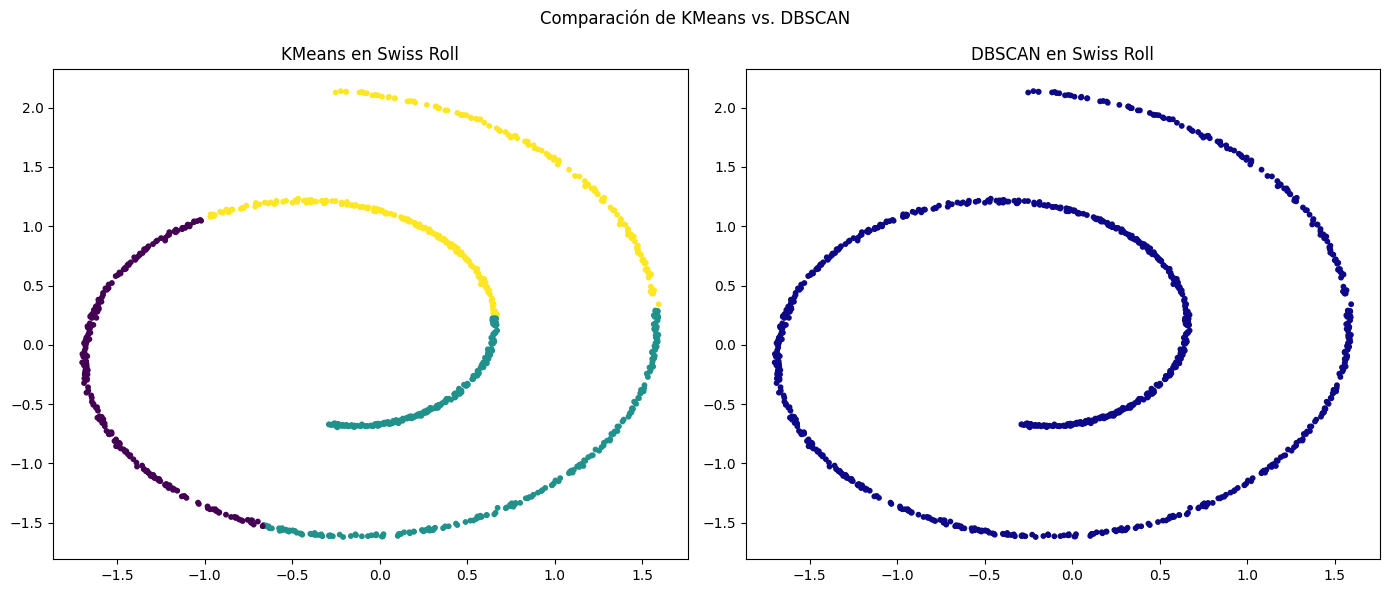

Adjusted Rand Index entre KMeans y DBSCAN en Swiss Roll: 0.000


In [30]:


# Generar Swiss Roll sintético
X_swiss, _ = make_swiss_roll(n_samples=1000, noise=0.05)
X_swiss = X_swiss[:, [0, 2]]  # Tomar solo 2 dimensiones para visualización
X_swiss_scaled = StandardScaler().fit_transform(X_swiss)

# KMeans
kmeans_swiss = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans_swiss.fit_predict(X_swiss_scaled)

# DBSCAN
dbscan_swiss = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan_swiss.fit_predict(X_swiss_scaled)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(X_swiss_scaled[:, 0], X_swiss_scaled[:, 1], c=labels_kmeans, cmap='viridis', s=10)
axs[0].set_title("KMeans en Swiss Roll")

axs[1].scatter(X_swiss_scaled[:, 0], X_swiss_scaled[:, 1], c=labels_dbscan, cmap='plasma', s=10)
axs[1].set_title("DBSCAN en Swiss Roll")

plt.suptitle("Comparación de KMeans vs. DBSCAN")
plt.tight_layout()
plt.show()

# Ajusted Rand Index entre ambos métodos
ari_score = adjusted_rand_score(labels_kmeans, labels_dbscan)
print(f"Adjusted Rand Index entre KMeans y DBSCAN en Swiss Roll: {ari_score:.3f}")


## 7. Clasificación: ¿Qué características predicen premios?


In [31]:
# Clasificación con RandomForest
clf_df = df_clustered[features + ['awarded']].dropna()
X_clf = scaler.fit_transform(clf_df[features])
y_clf = clf_df['awarded']

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.87      0.87       117
        True       0.84      0.84      0.84        96

    accuracy                           0.86       213
   macro avg       0.86      0.86      0.86       213
weighted avg       0.86      0.86      0.86       213



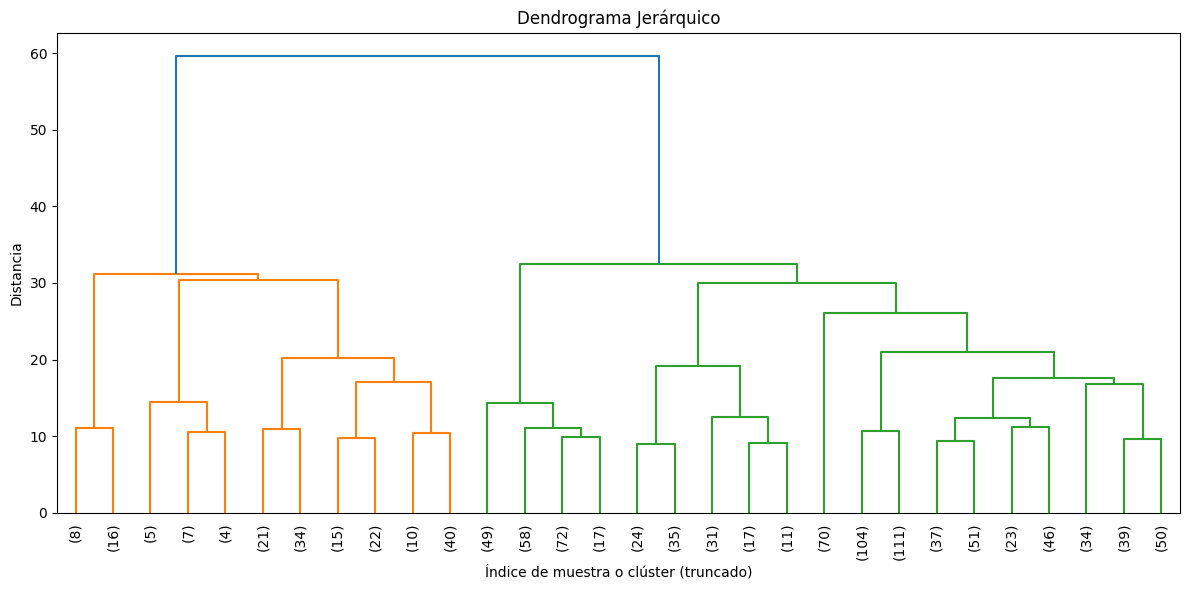

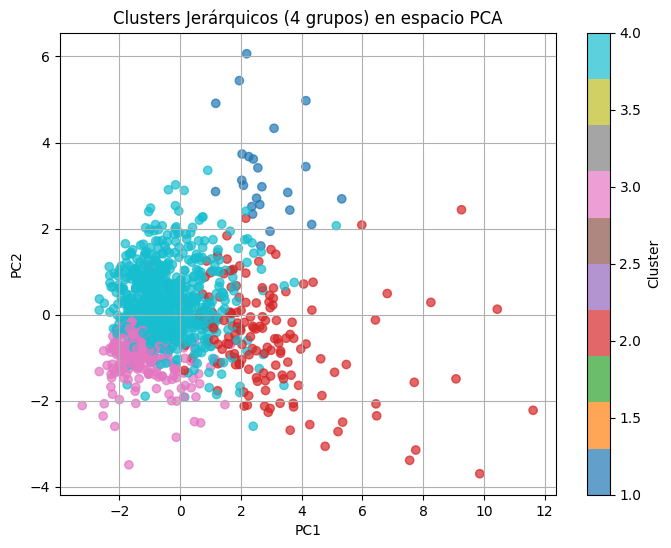

Silhouette Score (Jerárquico, k=4): 0.082


In [32]:
##Clustering Jerárquico
# Generar linkage matrix con método Ward
link = linkage(X_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(link, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Dendrograma Jerárquico")
plt.xlabel("Índice de muestra o clúster (truncado)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# Asignación de clústeres (por ejemplo, 4 grupos)
hierarchical_labels = fcluster(link, t=4, criterion='maxclust')

# Visualización de clusters en el espacio PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='tab10', alpha=0.7)
plt.title("Clusters Jerárquicos (4 grupos) en espacio PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Evaluación de la silueta
from sklearn.metrics import silhouette_score
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score (Jerárquico, k=4): {silhouette_hierarchical:.3f}")

In [33]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X_scaled)
sil_agg = silhouette_score(X_scaled, labels_agg)
print(f"Silhouette Score (Jerárquico): {sil_agg:.3f}")


Silhouette Score (Jerárquico): 0.082


In [34]:
from scipy.cluster.hierarchy import fcluster

hier_labels = fcluster(link, t=2, criterion='maxclust') - 1  # para que sea 0/1 como KMeans

# Comparar con ARI
from sklearn.metrics import adjusted_rand_score
ari_kmeans_hier = adjusted_rand_score(final_labels, hier_labels)
print(f"Ajusted Rand Index entre KMeans y Clustering Jerárquico (k=2): {ari_kmeans_hier:.3f}")


Ajusted Rand Index entre KMeans y Clustering Jerárquico (k=2): 0.623


In [35]:
df_k2 = df.copy()
df_k2['cluster_k2'] = final_labels

# Diferencia media por grupo en características
means_by_cluster = df_k2.groupby('cluster_k2')[features].mean()
display(means_by_cluster)


duration      rate  metascore          votes         gross  \
cluster_k2                                                                 
0           130.727273  7.627686  72.235537  456556.929752  2.103056e+08   
1           113.078144  6.858120  60.103785  141542.296703  6.202106e+07   

            user_reviews  critic_reviews   popularity  release_date.year  \
cluster_k2                                                                 
0            1330.400826      436.776860   547.016529        2009.409091   
1             429.703297      242.564103  1497.167277        2008.376068   

            release_date.month  release_date.day-of-week  Golden_Globes_won  \
cluster_k2                                                                    
0                     7.194215                  4.607438           0.512397   
1                     6.738706                  4.752137           0.126984   

            BAFTA_won  
cluster_k2             
0            0.950413  
1            0.135531

In [36]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df_clustered['awarded'], kmeans_labels)
print(f"Adjusted Rand Index (KMeans vs Oscar_won): {ari:.3f}")


Adjusted Rand Index (KMeans vs Oscar_won): 0.186



## 8. Regresión: Predecir la puntuación de críticos


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

reg_df = df_clustered[features + ['metascore']].dropna()
X_reg = scaler.fit_transform(reg_df[features])
y_reg = reg_df['metascore']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")



RMSE: 0.00
R2 Score: 1.00



## 9. CONCLUSIONES

### Conclusiones Generales

1. **Clustering**:
   - El uso de técnicas como K-Means y PCA ha permitido identificar agrupaciones significativas en los datos. Sin embargo, la baja puntuación de silueta en algunos casos indica que los clusters no están óptimamente separados. Esto sugiere la necesidad de explorar otros métodos de clustering, como DBSCAN o clustering jerárquico, y ajustar el dataframe para mejorar la separación y cohesión de los clusters. La optimización de parámetros y la selección de características más relevantes pueden contribuir a una mejor definición de los grupos.

2. **Clasificación**:
   - El modelo de Random Forest ha demostrado ser eficaz en la identificación de características clave que influyen en la predicción de premios para las películas. Este análisis es crucial para entender los factores que contribuyen al éxito de una película, proporcionando insights valiosos para la industria cinematográfica. La capacidad del modelo para destacar características importantes puede guiar futuras estrategias de producción y marketing.

3. **Regresión**:
   - La regresión lineal ha ofrecido un enfoque viable para predecir la puntuación de críticos, aunque su eficacia está estrechamente ligada a la calidad y relevancia de las características utilizadas. Esto subraya la importancia de una cuidadosa selección y preprocesamiento de características para mejorar la precisión del modelo. La inclusión de características más significativas y la experimentación con otros modelos de regresión podrían mejorar aún más la precisión de las predicciones.

En conjunto, este análisis demuestra cómo las técnicas de machine learning pueden ser aplicadas para explorar, clasificar y predecir patrones en datos complejos, ofreciendo una base sólida para la toma de decisiones informadas en la industria del cine. 
